# Exploratory data analysis of the dataset 
The dataset we will be using is a reanalysis dataset provided by National Weather Direction of Madagascar.

Importing all the needed libraries

In [2]:
library("dplyr")
library("readxl")
library("ggplot2")
library("lubridate")
library("tseries")
library("forecast")

Reading the dataset with readxl and explore its head and its summary.

In [3]:
data = read_excel("/media/dina/f4c07323-3819-4c76-ad53-95f7d45b7ae2/weather_data_vizualisation/data.xlsx")
head(data)
summary(data)

date,RR,MSLP,FF10,FF200,FF700,FF850,RH500,RH700,Tmin,Tmax,Tmoy
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1993-01-01,3.6,1017.4,2.716537,25.85169,5.512872,3.39564,27.92494,73.43215,17.7,27.8,21.6
1993-01-02,6.7,1015.5,4.338355,8.151109,5.183357,7.844608,45.49866,78.35376,17.9,27.5,21.9
1993-01-03,16.6,1013.2,4.43866,15.70747,10.18365,8.940825,68.28097,82.5871,16.9,26.2,20.7
1993-01-04,1.1,1013.7,7.050377,25.36832,5.328906,12.15593,41.93768,77.08398,16.6,23.9,19.8
1993-01-05,1.1,1015.7,6.355413,27.67465,5.66897,11.03134,45.03161,76.19373,17.3,25.1,20.6
1993-01-06,0.1,1016.7,5.703236,17.93404,6.19368,9.423871,48.24716,60.41839,16.9,26.3,21.4


      date                  RR               MSLP            FF10          
 Min.   :1993-01-01   Min.   :  0.000   Min.   : 998.7   Length:10957      
 1st Qu.:2000-07-02   1st Qu.:  0.000   1st Qu.:1015.6   Class :character  
 Median :2008-01-01   Median :  0.200   Median :1018.3   Mode  :character  
 Mean   :2008-01-01   Mean   :  3.001   Mean   :1018.5                     
 3rd Qu.:2015-07-02   3rd Qu.:  1.800   3rd Qu.:1021.5                     
 Max.   :2022-12-31   Max.   :145.300   Max.   :1030.0                     
    FF200              FF700              FF850              RH500          
 Length:10957       Length:10957       Length:10957       Length:10957      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

# Monthly data plot function
This is a function to plot a parameter monthly and display every month separately. As an example we are plotting the mean temperature for the Analamanga region display each month from 1993 to 2022.

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


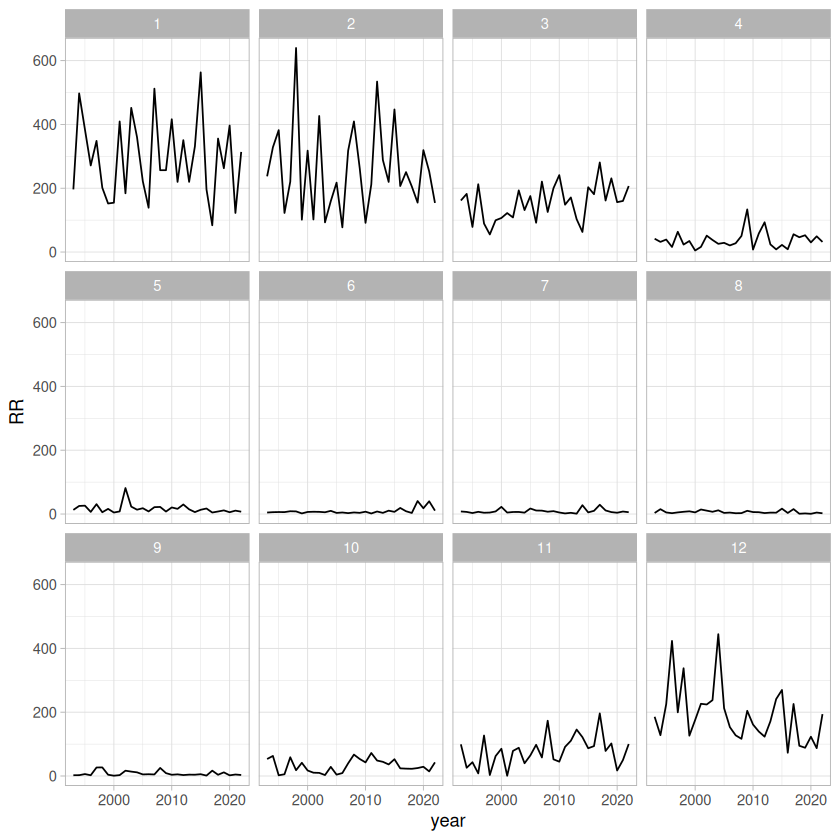

In [4]:
m = data%>%
mutate(month = month(date),year = year(date))%>%
group_by(month,year)%>%
summarize(RR = sum(.data[["RR"]]),MSLP = mean(.data[["MSLP"]]),FF10 = mean(as.integer(.data[["FF10"]])),
FF200 = mean(as.integer(.data[["FF200"]])),FF700 = mean(as.integer(.data[["FF700"]])),FF850 = mean(as.integer(.data[["FF850"]])),RH500 = mean(as.integer(.data[["RH500"]])),RH700 = mean(as.integer(.data[["RH700"]])),Tmin = mean(.data[["Tmin"]]),Tmax = mean(.data[["Tmax"]]),Tmoy = mean(.data[["Tmoy"]]))

ggplot(data = m)+
geom_line(aes(x = year,y = RR))+
facet_wrap(~ month)+
theme_light()


Grouping the dataset by month and make a little exploration

In [5]:
monthly = data%>%
group_by(month(date))%>%
summarize(RR  = sum(.data[["RR"]]),MSLP = mean(.data[["MSLP"]]),FF10 = mean(as.integer(.data[["FF10"]])),
FF200 = mean(as.integer(.data[["FF200"]])),FF700 = mean(as.integer(.data[["FF700"]])),FF850 = mean(as.integer(.data[["FF850"]])),RH500 = mean(as.integer(.data[["RH500"]])),RH700 = mean(as.integer(.data[["RH700"]])),Tmin = mean(.data[["Tmin"]]),Tmax = mean(.data[["Tmax"]]),Tmoy = mean(.data[["Tmoy"]]))

monthly


month(date),RR,MSLP,FF10,FF200,FF700,FF850,RH500,RH700,Tmin,Tmax,Tmoy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8828.5,1014.102,4.888172,20.87527,10.011828,8.926882,57.653763,74.13333,17.225269,25.27753,20.53387
2,7752.1,1013.854,5.141677,19.80047,10.681228,9.312869,54.216057,72.83353,17.191499,25.08760,20.46328
3,4661.4,1015.253,5.224731,22.14086,9.780645,9.756989,43.179570,67.20000,16.813118,25.02323,20.19634
4,1134.4,1017.509,5.178889,38.14667,8.228889,10.003333,26.645556,58.05111,15.221333,24.22978,19.02800
5,497.8,1019.638,5.066667,53.19785,8.883871,9.897849,12.774194,51.29247,12.995376,22.27989,16.97656
6,275.1,1022.098,5.922222,42.81333,10.388889,11.831111,6.892222,39.77444,10.705111,19.86189,14.63533
7,258.5,1023.212,6.484946,36.59785,11.465591,12.854839,6.205376,37.92796,9.940538,18.99989,13.79376
8,187.8,1022.705,6.061290,36.42366,10.978495,11.768817,5.455914,38.60108,10.049247,20.44247,14.56505
9,236.6,1021.369,5.863333,37.46889,11.196667,10.948889,7.673333,45.25000,11.220222,22.77256,16.30256


# Grouping by year and make visualization



In [6]:
pere_year = data%>%
group_by(year(date))%>%
summarize(RR = sum(.data[["RR"]]),MSLP = mean(.data[["MSLP"]]),FF10 = mean(as.integer(.data[["FF10"]])),
FF200 = mean(as.integer(.data[["FF200"]])),FF700 = mean(as.integer(.data[["FF700"]])),FF850 = mean(as.integer(.data[["FF850"]])),RH500 = mean(as.integer(.data[["RH500"]])),RH700 = mean(as.integer(.data[["RH700"]])),Tmin = mean(.data[["Tmin"]]),Tmax = mean(.data[["Tmax"]]),Tmoy = mean(.data[["Tmoy"]]))
names(pere_year) = names(data)
pere_year

date,RR,MSLP,FF10,FF200,FF700,FF850,RH500,RH700,Tmin,Tmax,Tmoy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993,1006.5,1018.993,5.413699,35.97534,10.347945,10.254795,24.98630,54.07123,13.28411,22.80932,17.40466
1994,1311.8,1018.285,5.515068,35.08493,10.572603,10.378082,27.92055,55.32603,13.70219,22.94630,17.74301
1995,1201.2,1018.230,5.276712,34.22466,9.367123,9.898630,25.09315,55.03836,13.79342,23.29288,17.85589
1996,1083.9,1018.053,5.196721,32.00000,9.989071,9.702186,27.73224,53.32787,13.35082,23.28579,17.65027
1997,1182.4,1019.016,4.912329,38.32877,9.312329,9.443836,29.23562,60.30685,13.69151,22.97041,17.66137
1998,1331.0,1019.095,5.323288,33.68493,8.832877,10.191781,25.80548,53.38356,13.90521,23.36466,17.93726
1999,656.5,1019.032,5.452055,33.54247,9.115068,10.345205,24.26849,56.12877,13.27342,23.15836,17.55096
2000,901.8,1018.409,5.773224,31.74044,10.191257,10.773224,25.67486,59.16120,13.46475,22.98033,17.55082
2001,924.0,1018.501,5.084932,32.43014,9.498630,9.487671,22.32603,53.21370,13.76822,23.86301,18.10712


Plotting parameters by year

`geom_smooth()` using formula = 'y ~ x'


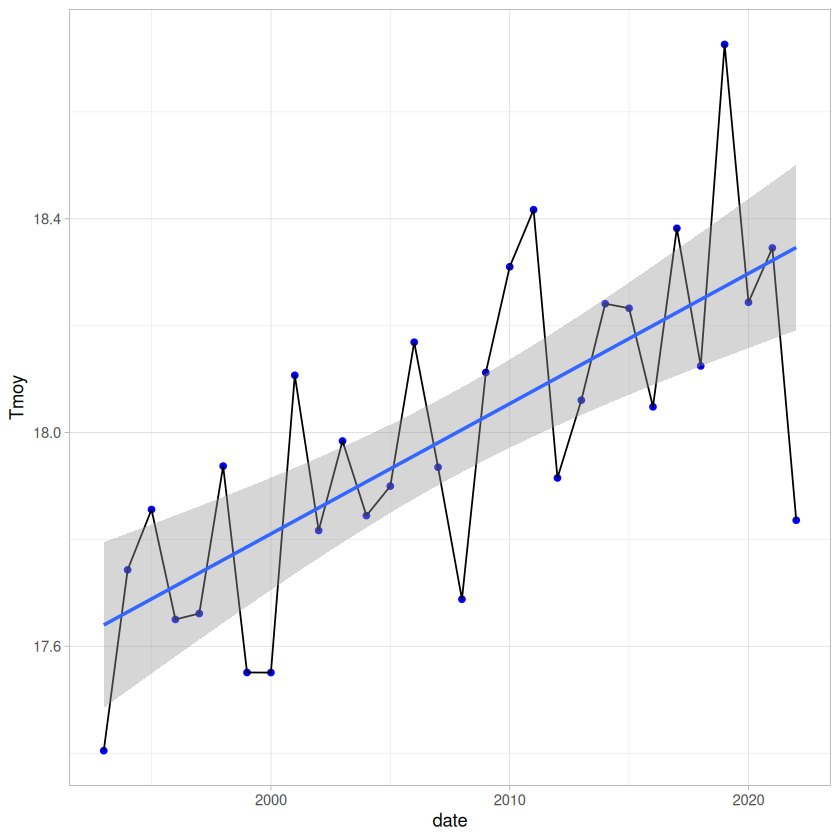

In [7]:
year_plot = function(parameter){
ggplot(pere_year)+
geom_point(mapping = aes(x = .data[["date"]],y = .data[[parameter]]),color = "blue")+
geom_line(mapping = aes(x = .data[["date"]],y = .data[[parameter]]))+
geom_smooth(mapping = aes(x = .data[["date"]],y = .data[[parameter]]),method = "lm")+
labs(x = "date",y = parameter)+
theme_light()}
year_plot("Tmoy")


# Monthly Forecasting with the arima model
Now we are trying to forecast monthly parameter using the arima model. This model will be fitted automatically. The goal here is to predict the next year temperature value for the selected month. For example here we are predicting the next year rainfall for  October.

Time Series:
Start = 31 
End = 31 
Frequency = 1 
[1] 35.85434


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.2577104,19.21464,16.15477,-134.6339,164.1248,0.8891407,-0.01604304


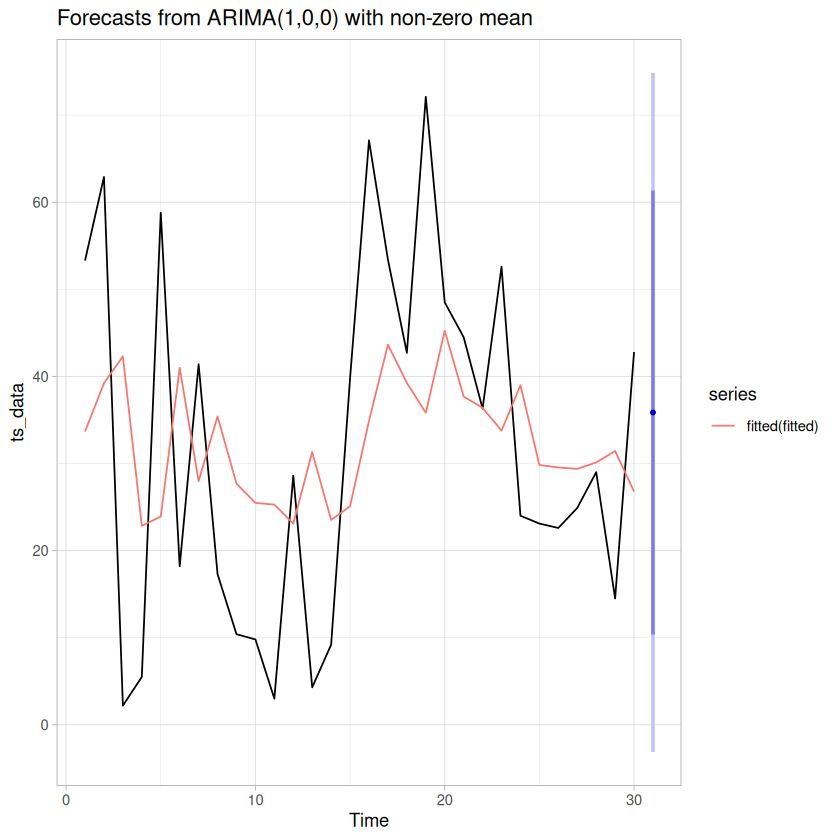

In [12]:
df = m%>%filter(month == 10)
ts_data = ts(df[["RR"]],frequency = 1)
fitted = auto.arima(ts_data)
forecasted = forecast(fitted,h = 1)
print(forecasted$mean)
autoplot(forecasted)+autolayer(fitted(fitted))+theme_light()
accuracy(fitted)

# Forecasting next year parameter value
Now we are trying to forecast a selected paramter value for the next year with auto.arima

Series: ts_data 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7123
s.e.   0.1087

sigma^2 = 0.06193:  log likelihood = -0.66
AIC=5.31   AICc=5.78   BIC=8.05


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.07498335,0.2404243,0.1877421,0.4050835,1.038145,0.743097,-0.1765932


Time Series:
Start = 31 
End = 31 
Frequency = 1 
[1] 18.18038


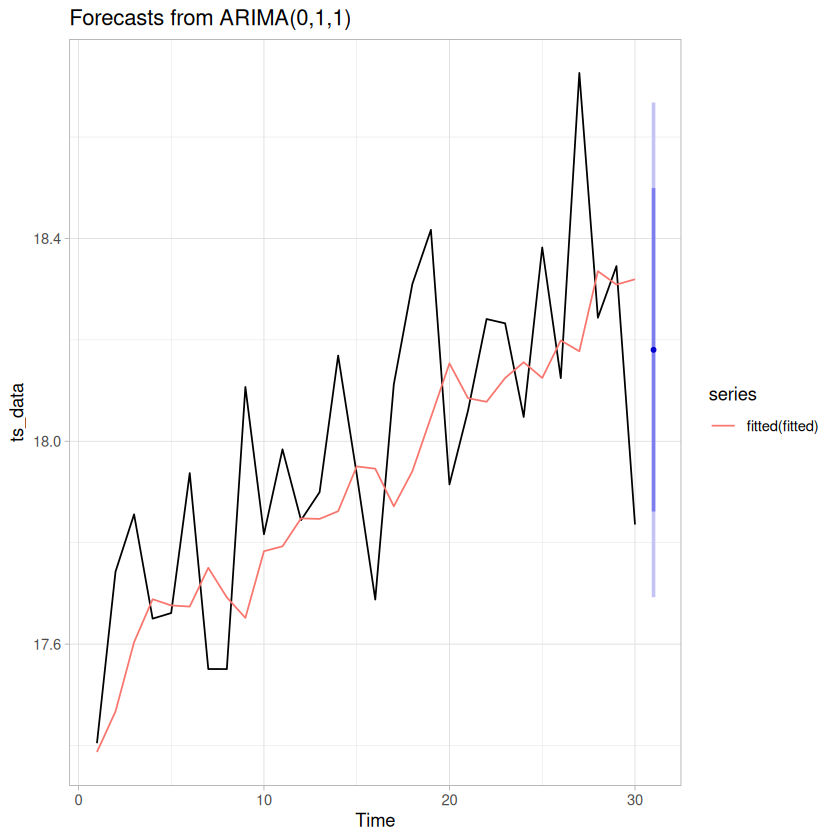

In [13]:
df = pere_year[["Tmoy"]]
ts_data = ts(df,frequency = 1)
fitted = auto.arima(ts_data)
forecasted = forecast(fitted,h = 1)
print(fitted)
autoplot(forecasted)+autolayer(fitted(fitted))+theme_light()
accuracy(fitted)
print(forecasted$mean)